In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist['url']

'https://www.openml.org/d/554'

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
import matplotlib as mpl

In [10]:
import matplotlib.pyplot as plt

In [11]:
some_digit = X.loc[0]

In [12]:
some_digit_image = np.array(some_digit).reshape(28,28)

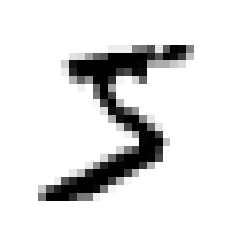

In [13]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [14]:
y[0]

'5'

In [15]:
y = y.astype(np.int8)

In [16]:
y.describe

<bound method NDFrame.describe of 0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int8>

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [18]:
X_train.shape

(60000, 784)

In [19]:
y_test.shape

(10000,)

Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning)

In [20]:
from sklearn.linear_model import SGDClassifier

In [21]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [22]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [23]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [24]:
sgd_clf.predict([some_digit])

array([ True])

    some_digit was 5

In [25]:
sgd_clf.predict([X.loc[59997,]])

array([ True])

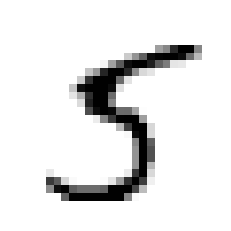

In [26]:
some_digi_59997 = X.loc[59997,]
some_digit_image = np.array(some_digi_59997).reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

## Performance measure

### Using Cross Validation method

In [27]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
y_train_5.head(10)

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: class, dtype: bool

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=10, scoring="accuracy")

array([0.96416667, 0.95866667, 0.96416667, 0.95833333, 0.96733333,
       0.96933333, 0.96433333, 0.96583333, 0.9575    , 0.96566667])

#### Accuracy is over 90%

Defining a dumb Classifier which classifies all the prediction as not 5

In [30]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [31]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

### Still the accuracy is over 90%

This is because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time

In [32]:
from sklearn.model_selection import cross_val_predict

In [33]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

In [34]:
y_train_pred 

array([ True, False, False, ...,  True, False, False])

In [35]:
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
confusion_matrix(y_train_5, y_train_pred)

array([[53115,  1464],
       [  916,  4505]], dtype=int64)

    53115  non 5 = True negatives
    1464 wrongly predicted as 5s = False positives
    916 wrongly classified as non 5 = False negatives
    4505 correctly classified as 5 = True positives

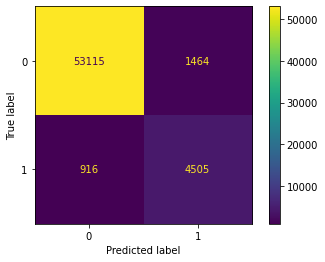

In [36]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

#### A prefect classifiers would have only true positives and true negatives

In [37]:
y_train_perfect_pred = y_train_5

In [38]:
confusion_matrix(y_train_5, y_train_perfect_pred)

array([[54579,     0],
       [    0,  5421]], dtype=int64)


    precision = TP/(TP + FP)
    recall = TP/(TP + FN)

In [39]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)

0.7547327860613168

In [40]:
recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)

0.8310274857037447

    Now the binary classifier doesn't looks impressive
    It is correct 75.4% of time 
    It detects only 83.1% of 5s

### F1_score
    Mean treats all the values equally
    Harmonic mean gives more weight to low values
    F1_score is the harmonic mean of recall and precision 

In [41]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.791044776119403

In [42]:
 y_scores = sgd_clf.decision_function([some_digit])

In [43]:
y_scores

array([2164.22030239])

In [44]:
threshold = 0

In [45]:
y_some_digit_pred = (y_scores > threshold)

In [46]:
y_some_digit_pred

array([ True])

In [47]:
threshold = 4000

In [48]:
y_some_digit_pred = (y_scores > threshold)

In [49]:
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually repre‐
sents a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 4000

In [50]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

    Mentioning method as decision_function we get decision scores for all instances

In [51]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [52]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

In [53]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [54]:
disp = PrecisionRecallDisplay(precision=precisions, recall=recalls)

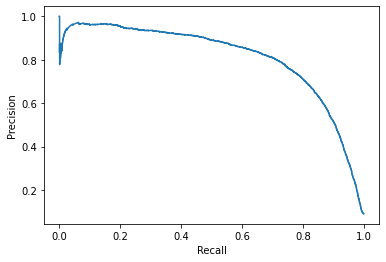

In [55]:
disp.plot()

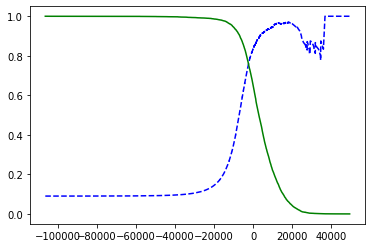

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [57]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [58]:
threshold_90_precision

3370.019499143958

In [59]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [60]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [61]:
 recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [62]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [63]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

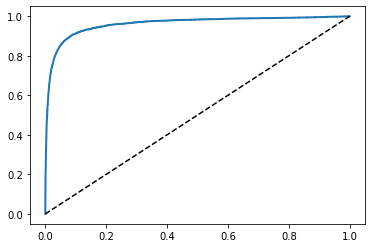

In [64]:
plot_roc_curve(fpr, tpr)
plt.show()

 The dotted line represents the ROC curve of a purely
random classifier; a good classifier stays as far away from that line as possible (toward
the top-left corner)

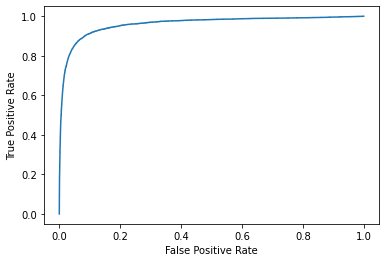

In [65]:
from sklearn.metrics import RocCurveDisplay
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [69]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [70]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

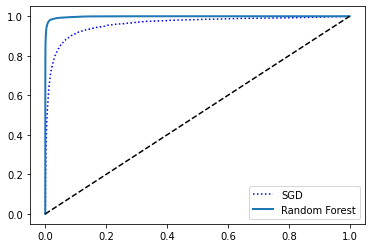

In [71]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [72]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [73]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

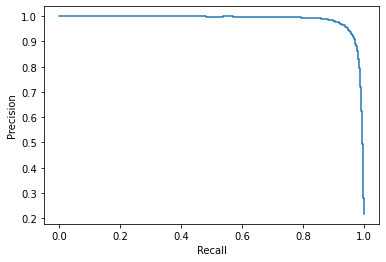

In [74]:
disp = PrecisionRecallDisplay(precision=precisions_forest, recall=recalls_forest)
disp.plot()

In [75]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [76]:
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [77]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

In [78]:
f1_score(y_train_5, y_train_pred_forest)

0.9242275142688446

In [79]:
forest_clf.fit(X_train, y_train_5)

RandomForestClassifier(random_state=42)

In [80]:
a = forest_clf.feature_importances_

In [81]:
np.argmax(a)

248

# Multiclass classifiers

In [82]:
from sklearn.svm import SVC

In [83]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train) 
svm_clf.predict([some_digit])

array([5], dtype=int8)

In [84]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [85]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [86]:
#from sklearn.multiclass import OneVsRestClassifier

In [87]:
#ovr_svm_clf = OneVsRestClassifier(SVC())               Takes a lot of time

In [88]:
#ovr_svm_clf.fit(X_train, y_train)

In [89]:
#ovr_svm_clf.predict([some_digit])

In [94]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [96]:
sgd_clf.predict([some_digit])

array([3], dtype=int8)

In [91]:
some_digit_image = np.array(some_digit).reshape(28,28)

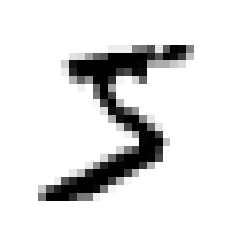

In [92]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [97]:
 sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [98]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [102]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [103]:
cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9596, 0.9602, 0.961 ])

In [104]:
svm_clf.fit(X_train_scaled, y_train)

SVC()

In [105]:
some_digit_scores_scaled = svm_clf.decision_function([some_digit])
some_digit_scores_scaled

array([[ 0.73163278, -0.28042564,  8.26565587,  6.21437041,  2.81341261,
         5.06595402,  7.24681577,  9.26868378,  1.76890179,  3.99357572]])